# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [3]:
image = imread('data/picture.jpg')


In [4]:
# shape de la imagen
print(image.shape)
print(image.nbytes)

(1728, 2304, 3)
11943936


In [5]:
# imprime las dimensiones de la imagen
# imprime el tamaño de la imagen
print(image.nbytes)
image

11943936


array([[[141, 101,  76],
        [142, 102,  77],
        [143, 103,  78],
        ...,
        [203, 213, 222],
        [206, 214, 225],
        [196, 204, 215]],

       [[143, 103,  78],
        [144, 104,  79],
        [144, 104,  79],
        ...,
        [207, 217, 226],
        [205, 213, 224],
        [197, 205, 216]],

       [[146, 108,  85],
        [143, 105,  82],
        [142, 101,  79],
        ...,
        [210, 219, 228],
        [203, 210, 220],
        [198, 205, 215]],

       ...,

       [[ 36,  52,  78],
        [ 39,  55,  81],
        [ 36,  52,  78],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 33,  49,  75],
        [ 36,  52,  78],
        [ 35,  51,  77],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 36,  52,  78],
        [ 39,  55,  81],
        [ 34,  50,  76],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

Muestra la imagen para ver que se ha cargado bien

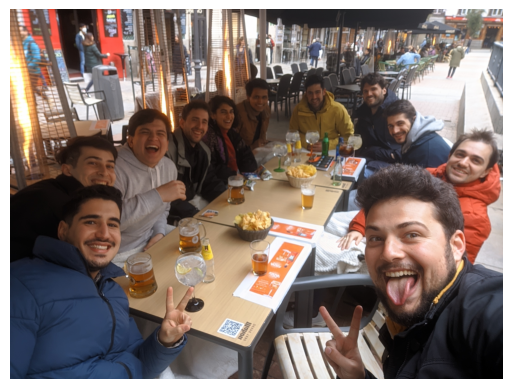

In [6]:
# muestra la imagen
# puedes utilizar plt.axis('off') para quitarle los ejes a la imagen;
plt.axis("off")
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [7]:
# reshape
image = image.reshape(-1, 3)

In [8]:
image

array([[141, 101,  76],
       [142, 102,  77],
       [143, 103,  78],
       ...,
       [  1,   1,   1],
       [  1,   1,   1],
       [  1,   1,   1]], shape=(3981312, 3), dtype=uint8)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [23]:
# Instancia un kmeans con n_clusters=20 y random_state=42
kmeans = KMeans(n_clusters=20, random_state=42)
# Entrena tu modelo
X = image.reshape(-1,3)
kmeans.fit(X)

KMeans(n_clusters=20, random_state=42)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [24]:
# labels_ del modelo
kmeans.labels_

array([19, 19, 19, ...,  9,  9,  9], shape=(3981312,), dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[ 36.21948741,  30.22013532,  30.90074354],
       [206.33478876, 202.70117079, 204.83447377],
       [175.61476619, 140.90037875, 115.12012928],
       [ 48.38002858,  65.55729176,  96.84013298],
       [244.90125101, 241.81225838, 241.23305707],
       [122.71981686,  84.33460869,  63.1961818 ],
       [204.87487452, 171.904214  , 146.98074726],
       [182.1097203 ,  79.85989296,  49.57708909],
       [ 62.19584946,  48.06608101,  42.56249532],
       [ 13.19066798,  10.3381309 ,  10.41646574],
       [ 98.62508639,  60.21546144,  38.90405225],
       [110.21766565, 101.05743586,  99.14494894],
       [236.25757851, 204.47931849, 170.30936472],
       [ 36.91878077,  47.97639696,  70.16554501],
       [163.12926431, 161.0424139 , 163.96444271],
       [ 82.50265614,  73.77644088,  71.88551333],
       [238.10617204, 161.92423061, 101.29763761],
       [232.95360613, 102.97622632,  78.93118145],
       [134.6679688 , 128.64593756, 128.22500874],
       [150.7651208 , 112.71471

In [31]:
# crea una nueva imagen en la que cada pixel se sustituye por su centroide

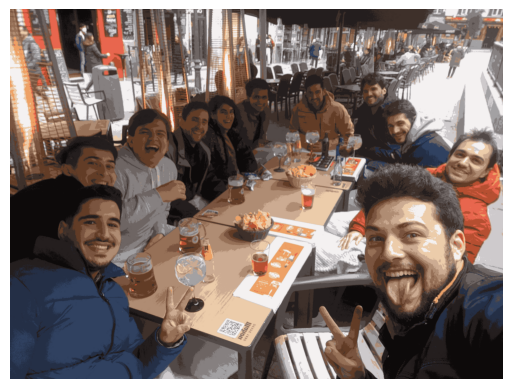

In [ ]:


# Cargar imagen
image = imread('data/picture.jpg')

# Reestructurar la imagen a un array 2D (pixeles x canales)
x = image.reshape(-1, 3)

# Aplicar KMeans
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(x)

# Reemplazar cada píxel con el color del centroide de su clúster
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

# Si hace falta, asegurar tipo correcto (dependiendo del tipo original de la imagen)
if segmented_img.max() <= 1.0:
    segmented_img = (segmented_img * 255).astype(np.uint8)
else:
    segmented_img = segmented_img.astype(np.uint8)

# Mostrar imagen segmentada
plt.imshow(segmented_img)
plt.axis('off')
plt.show()


#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [ ]:
# shape de la nueva imagen

In [34]:
segmented_img.shape

(1728, 2304, 3)

In [ ]:
# reshape

In [42]:
segmented_img = segmented_img.reshape(image.shape)  # forma: (alto, ancho, 3)

segmented_img.shape

(1728, 2304, 3)

In [43]:
# shape después del reshape

In [44]:
segmented_img.shape

(1728, 2304, 3)

In [46]:
!pip install imageio


#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [45]:
# muestra el array de la nueva imagen
segmented_img

array([[[150, 112,  87],
        [150, 112,  87],
        [150, 112,  87],
        ...,
        [206, 202, 204],
        [206, 202, 204],
        [206, 202, 204]],

       [[150, 112,  87],
        [150, 112,  87],
        [150, 112,  87],
        ...,
        [206, 202, 204],
        [206, 202, 204],
        [206, 202, 204]],

       [[150, 112,  87],
        [150, 112,  87],
        [150, 112,  87],
        ...,
        [206, 202, 204],
        [206, 202, 204],
        [206, 202, 204]],

       ...,

       [[ 36,  47,  70],
        [ 36,  47,  70],
        [ 36,  47,  70],
        ...,
        [ 13,  10,  10],
        [ 13,  10,  10],
        [ 13,  10,  10]],

       [[ 36,  47,  70],
        [ 36,  47,  70],
        [ 36,  47,  70],
        ...,
        [ 13,  10,  10],
        [ 13,  10,  10],
        [ 13,  10,  10]],

       [[ 36,  47,  70],
        [ 36,  47,  70],
        [ 36,  47,  70],
        ...,
        [ 13,  10,  10],
        [ 13,  10,  10],
        [ 13,  10,  10]]

In [47]:
# muestra la nueva imagen por pantalla
import imageio

imageio.imwrite('segmentada.jpg', segmented_img)


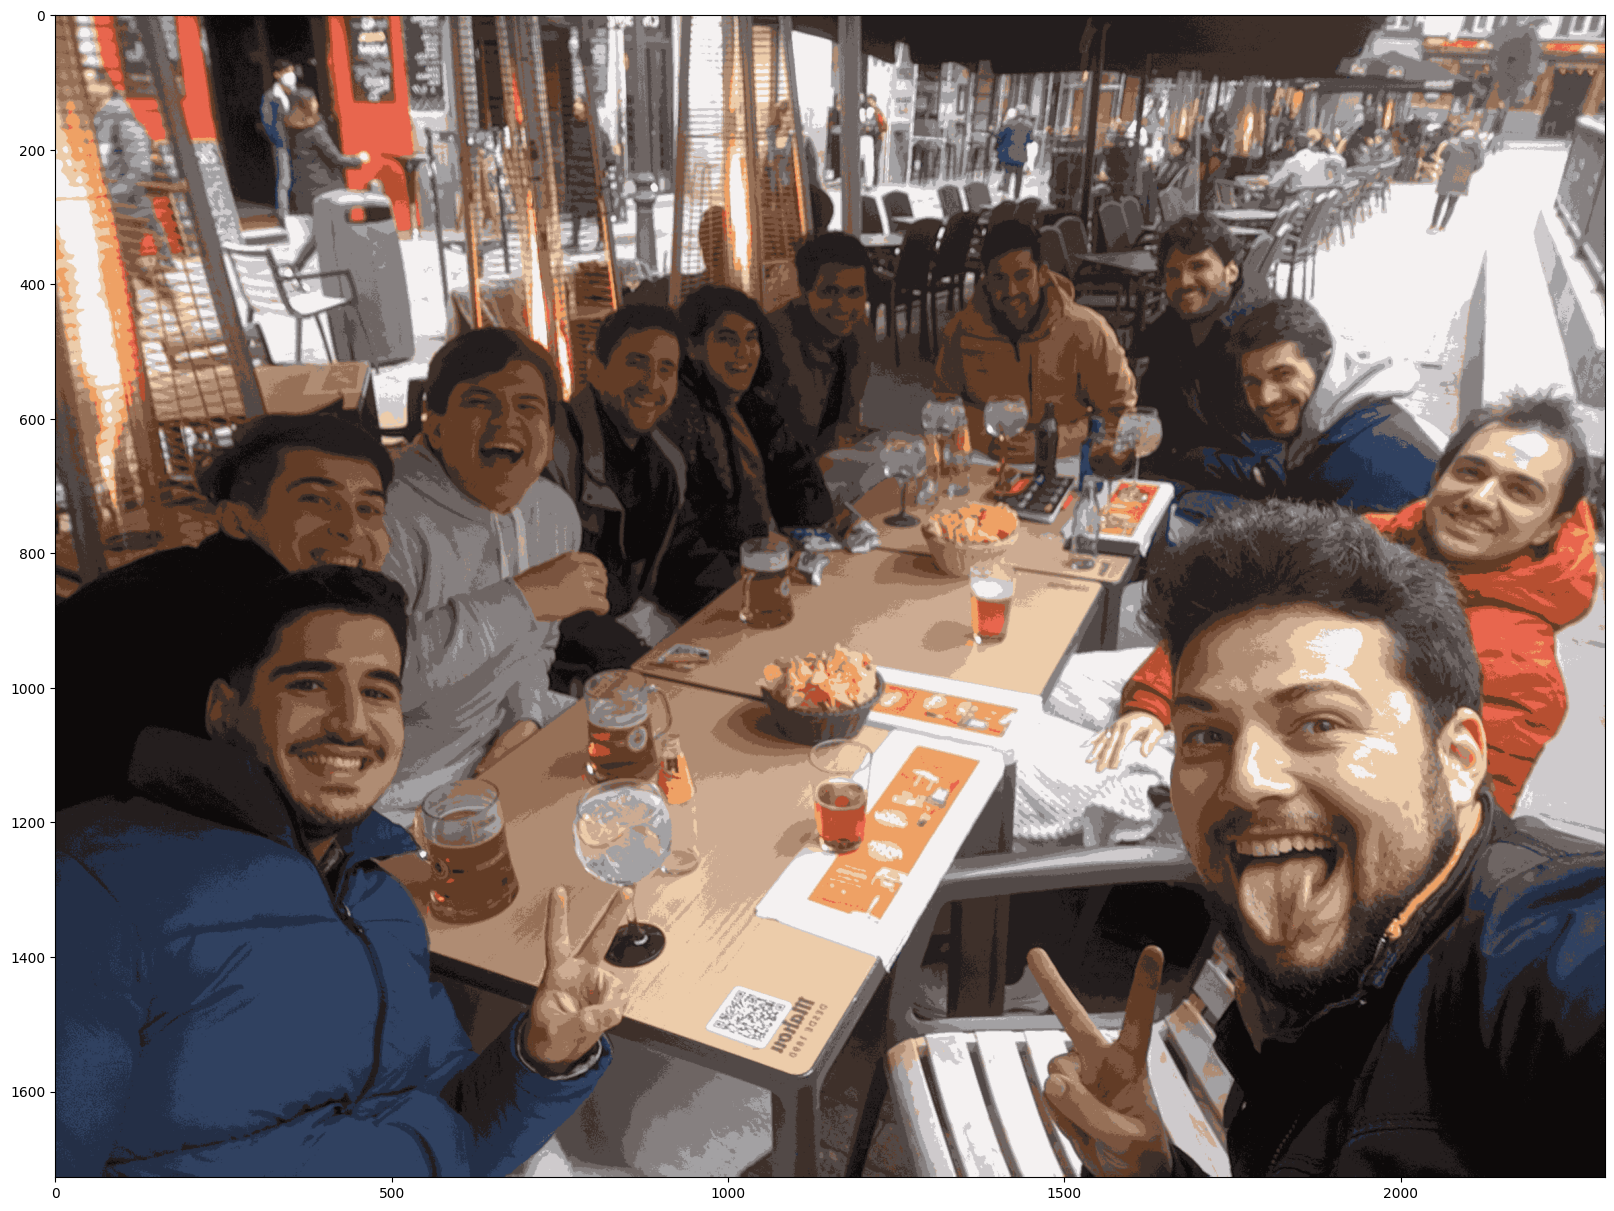

In [51]:
fig = plt.figure(figsize=(20,20))
plt.imshow(segmented_img.astype('uint8')) # fijate en esto hay que hacerle un astype para que se fume la imagen
fig.savefig('mi_imagen.jpg')

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [28]:
def cluster_colors(archivo_imagen, nombre_fichero, n_colors=10, save=False):
    image = imread(archivo_imagen)
    X = image.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    fig = plt.figure(figsize=(20,20))
    plt.imshow(segmented_img.astype('uint8'))
    if save:
        fig.savefig(nombre_fichero)
        
# de nada :)


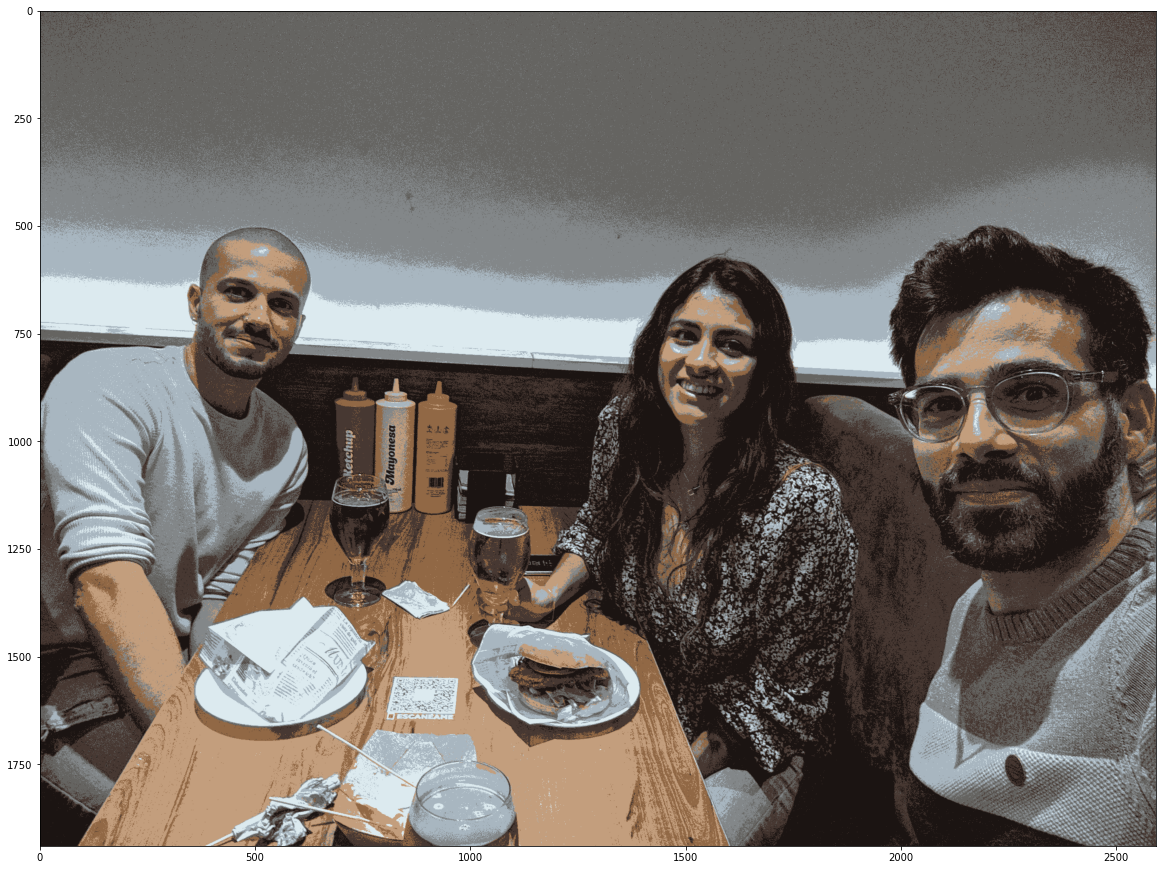

In [30]:
cluster_colors('data/picture_2.jpg', 'mi_imagen_2.jpg', n_colors=8, save=True)